In [4]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns',120)
pd.set_option('display.max_rows',120)

In [5]:
ross_df=pd.read_csv(r"C:\Users\shrey\OneDrive\VS code\Virtual env\data science\DATA\Rossman data\train.csv")
store_df=pd.read_csv(r"C:\Users\shrey\OneDrive\VS code\Virtual env\data science\DATA\Rossman data\store.csv")
test_df=pd.read_csv(r"C:\Users\shrey\OneDrive\VS code\Virtual env\data science\DATA\Rossman data\test.csv")
submission_df=pd.read_csv(r"C:\Users\shrey\OneDrive\VS code\Virtual env\data science\DATA\Rossman data\sample_submission.csv")

C:\Users\shrey\AppData\Local\Temp\ipykernel_38696\3646425266.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  ross_df=pd.read_csv(r"C:\Users\shrey\OneDrive\VS code\Virtual env\data science\DATA\Rossman data\train.csv")


In [6]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [7]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [8]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [9]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [11]:
merged_df=ross_df.merge(store_df,how='left',on='Store')
merged_test_df=test_df.merge(store_df,how='left',on='Store')

In [12]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


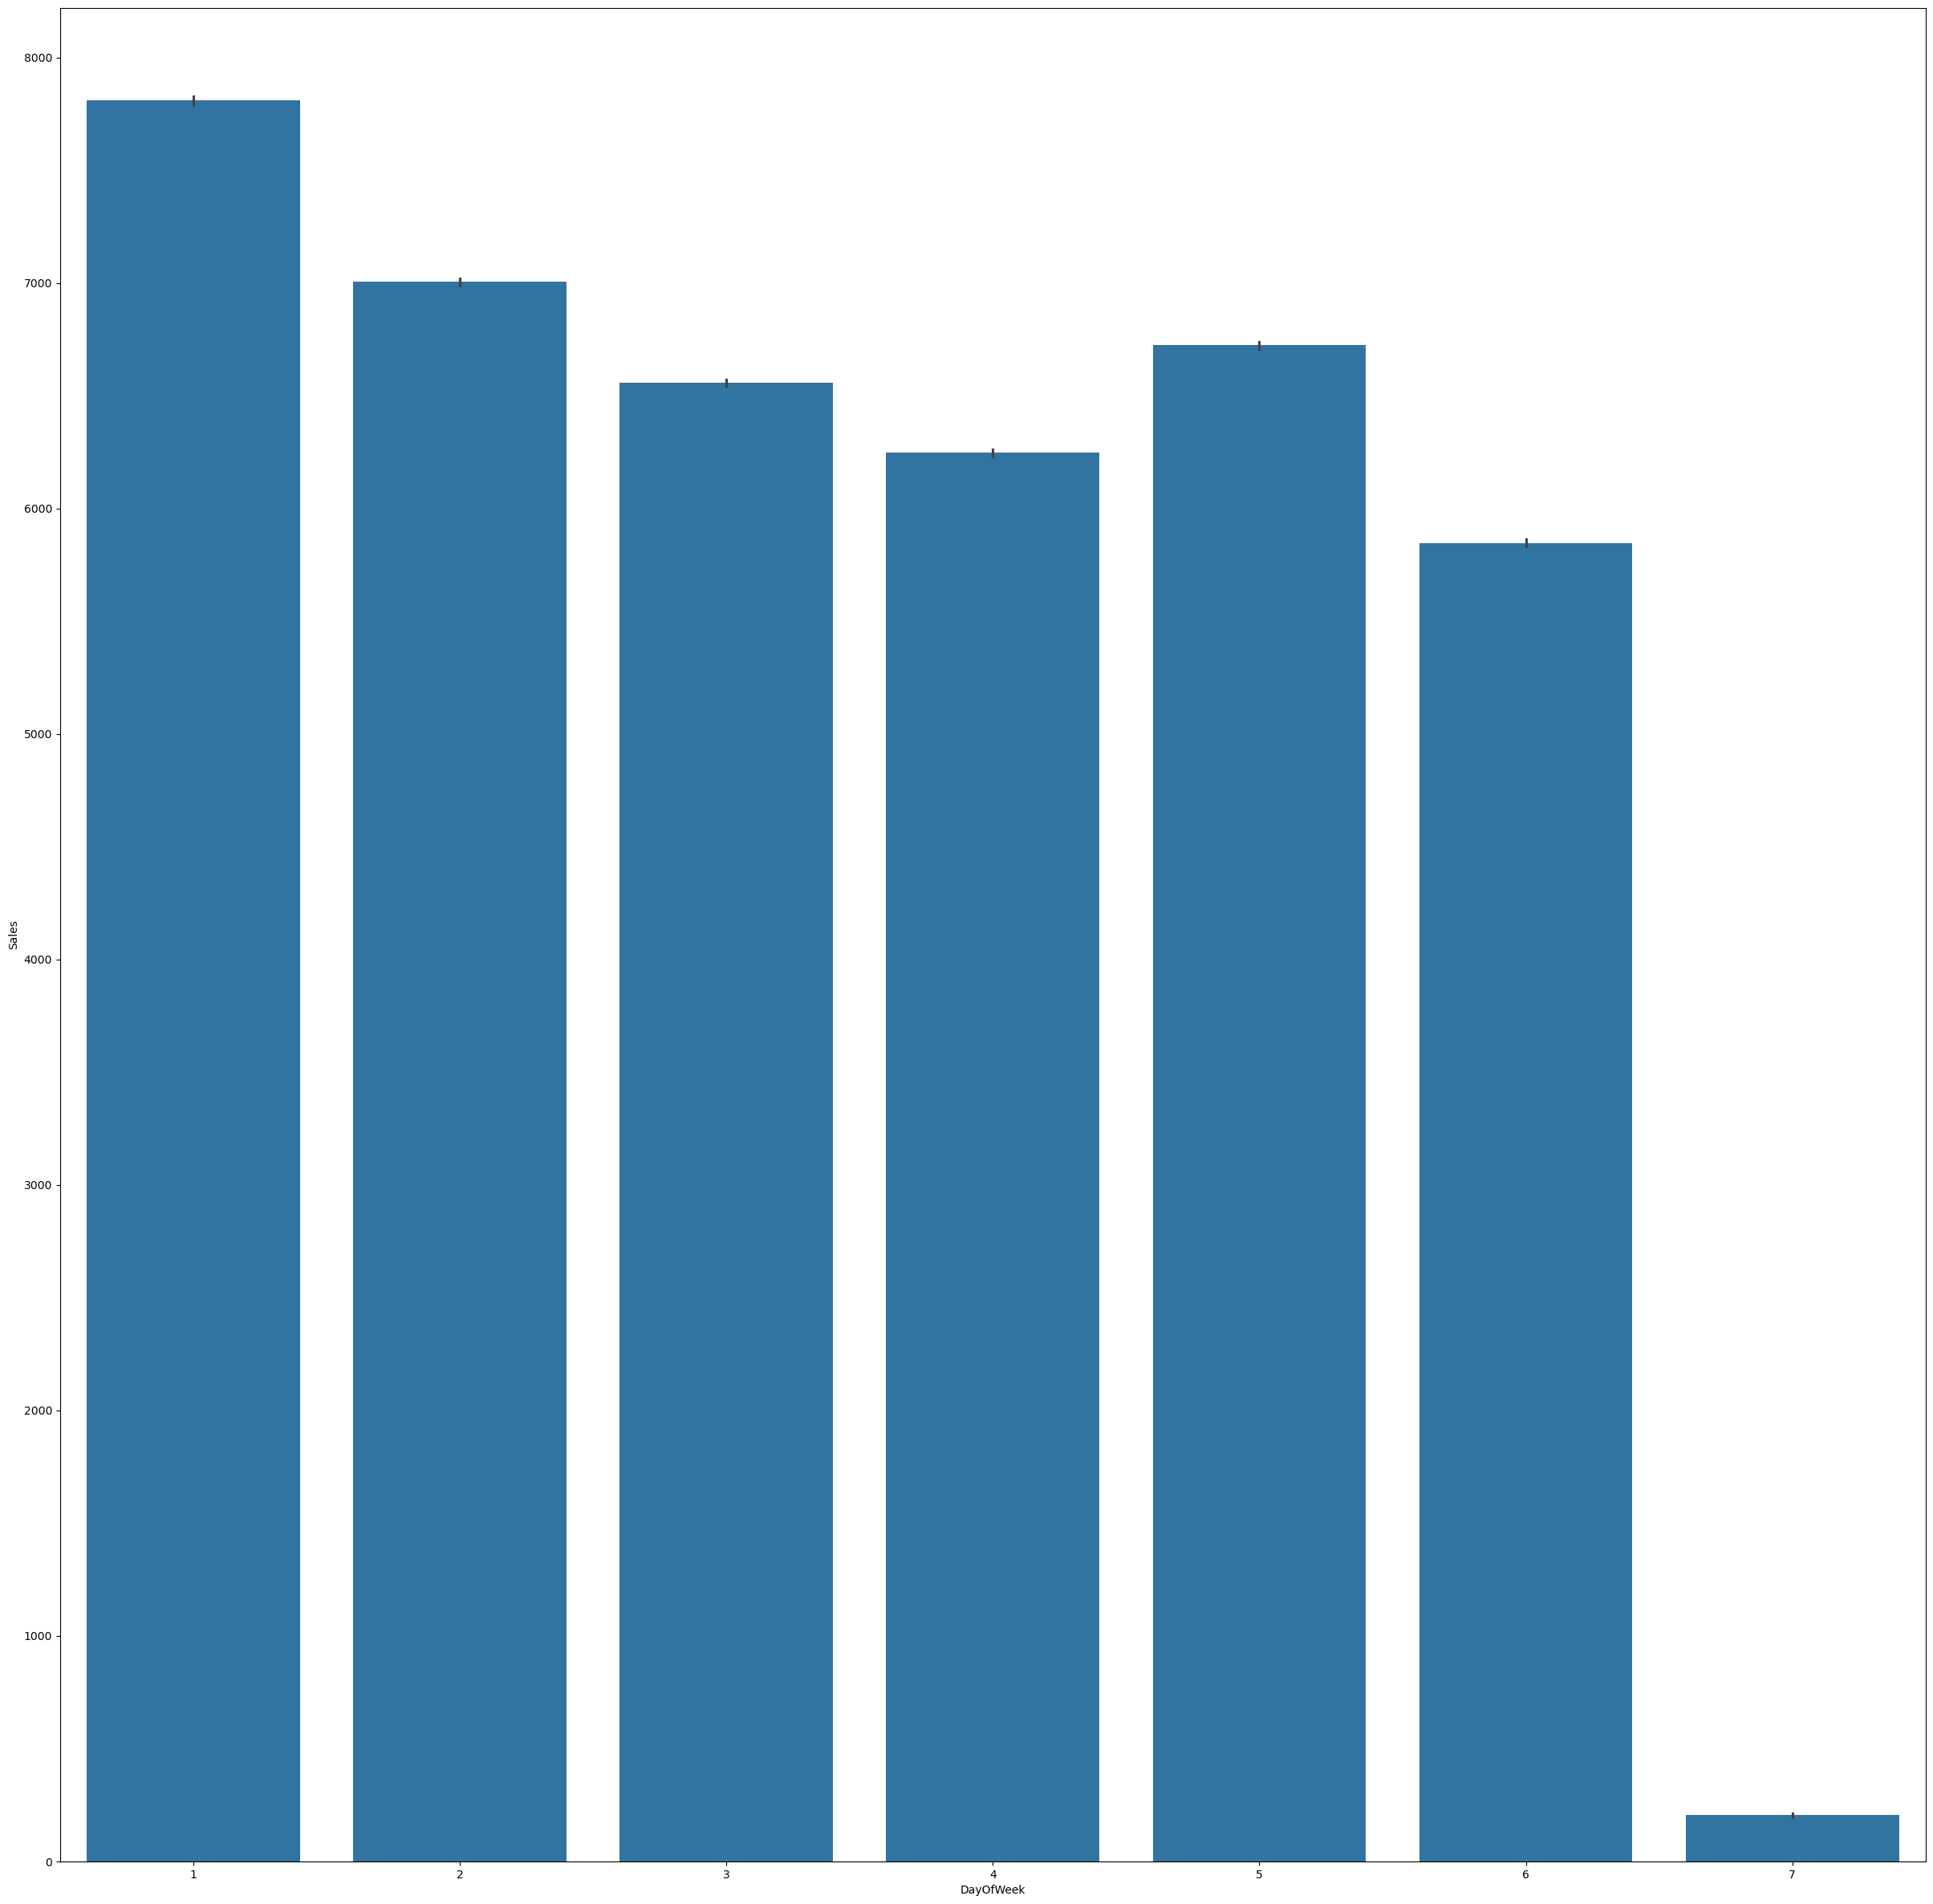

In [13]:
sns.barplot(merged_df,x='DayOfWeek',y='Sales')
plt.show()

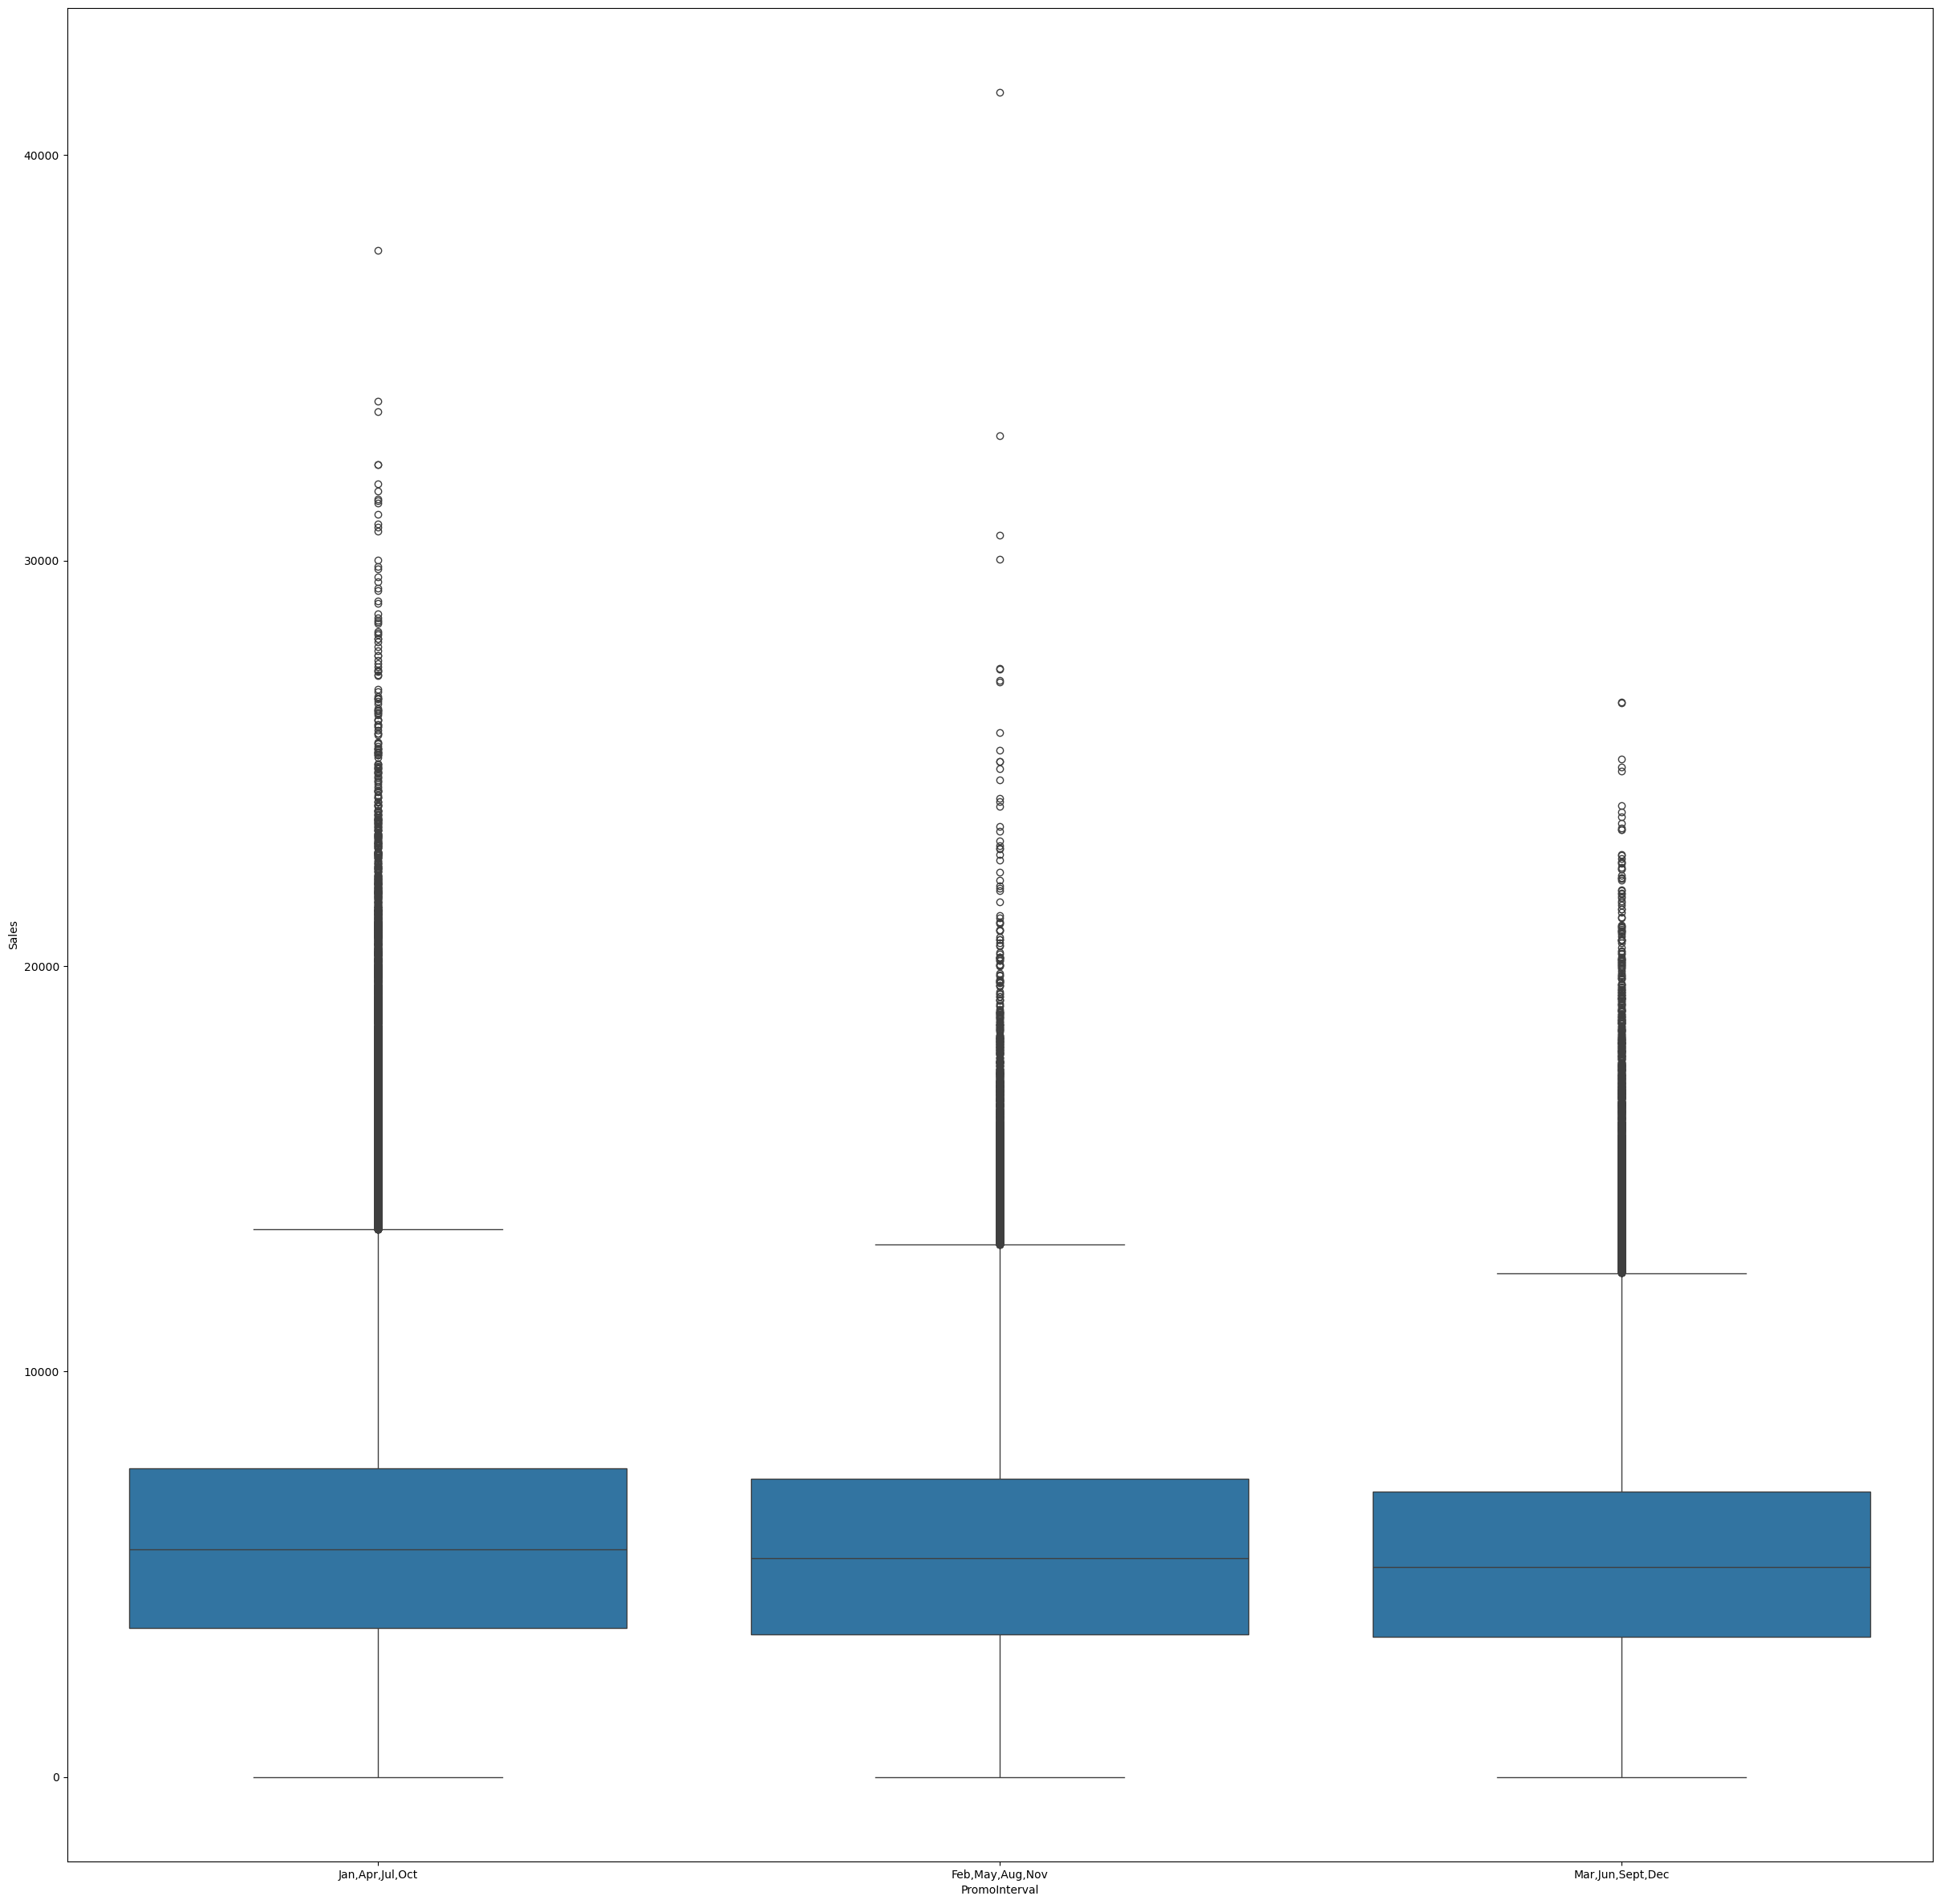

In [14]:
sns.boxplot(merged_df,x='PromoInterval',y='Sales')
plt.show()

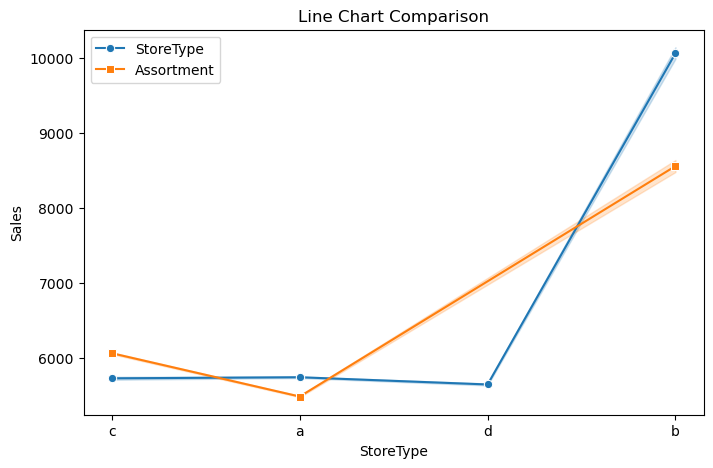

In [15]:
plt.figure(figsize=(8,5))
sns.lineplot(data=merged_df, x='StoreType', y='Sales', label='StoreType', marker='o')
sns.lineplot(data=merged_df, x='Assortment', y='Sales', label='Assortment', marker='s')
plt.title("Line Chart Comparison")
plt.show()

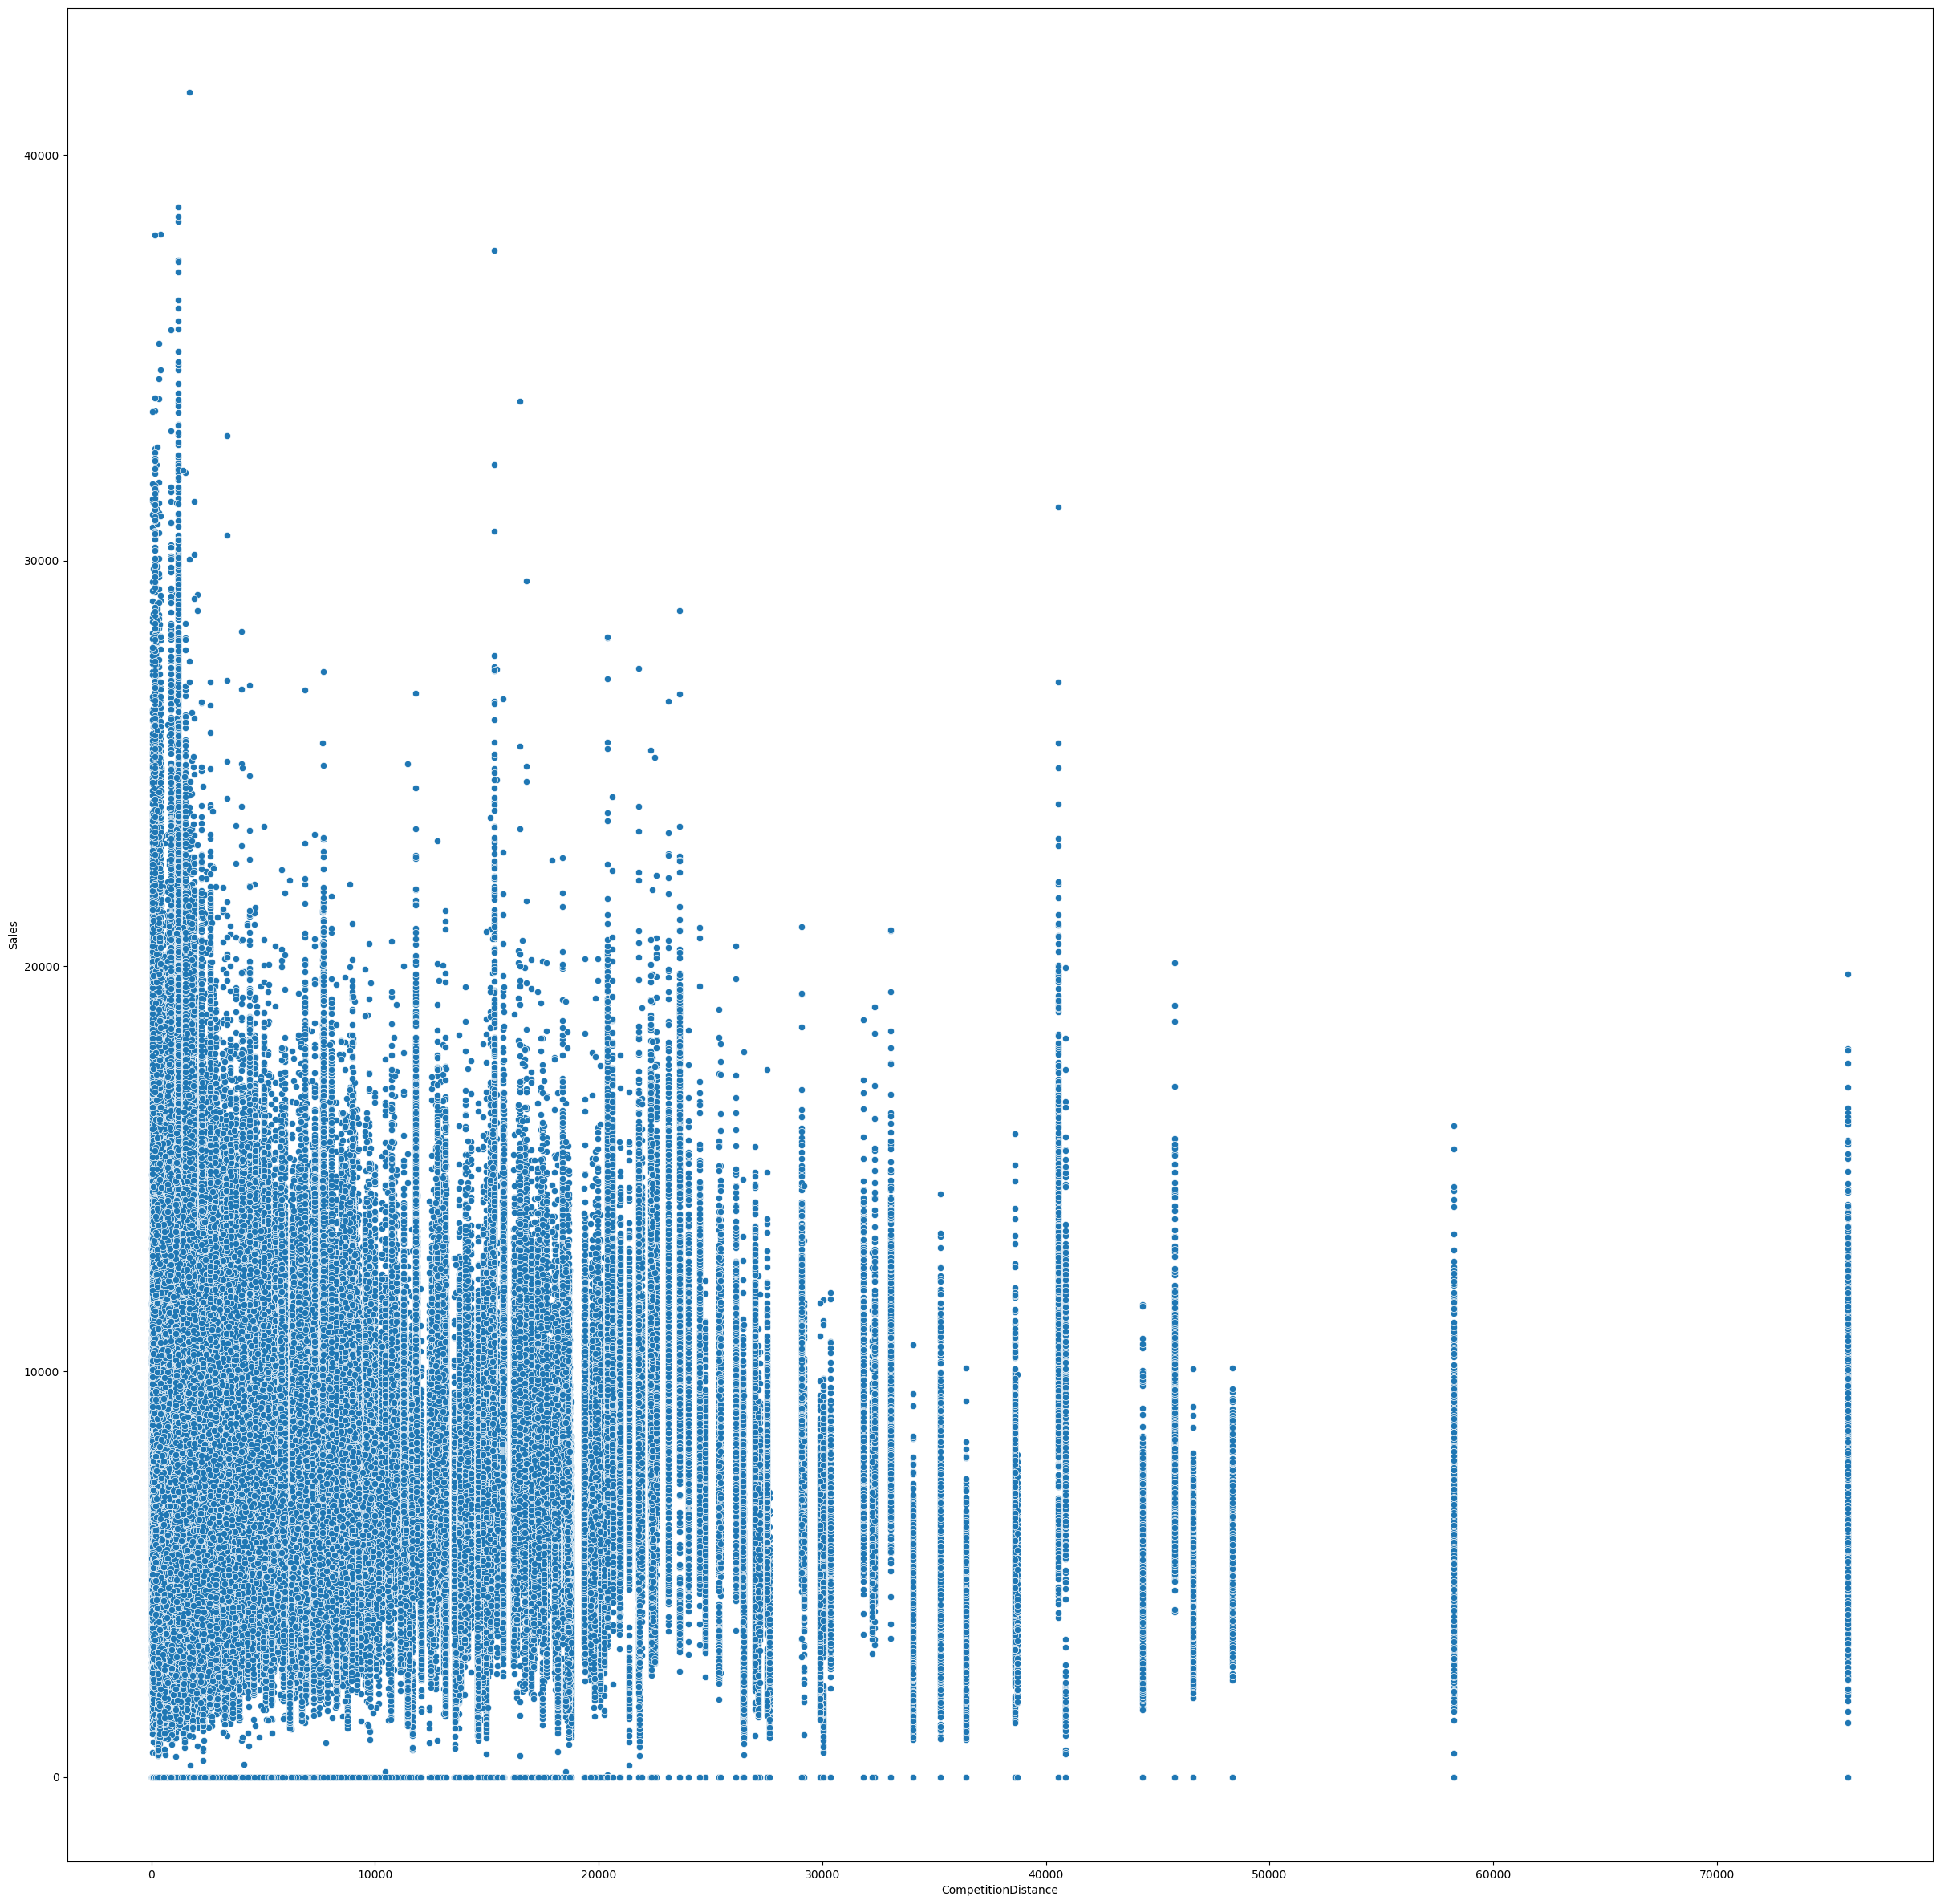

In [16]:
sns.scatterplot(merged_df,x='CompetitionDistance',y='Sales')
plt.show()

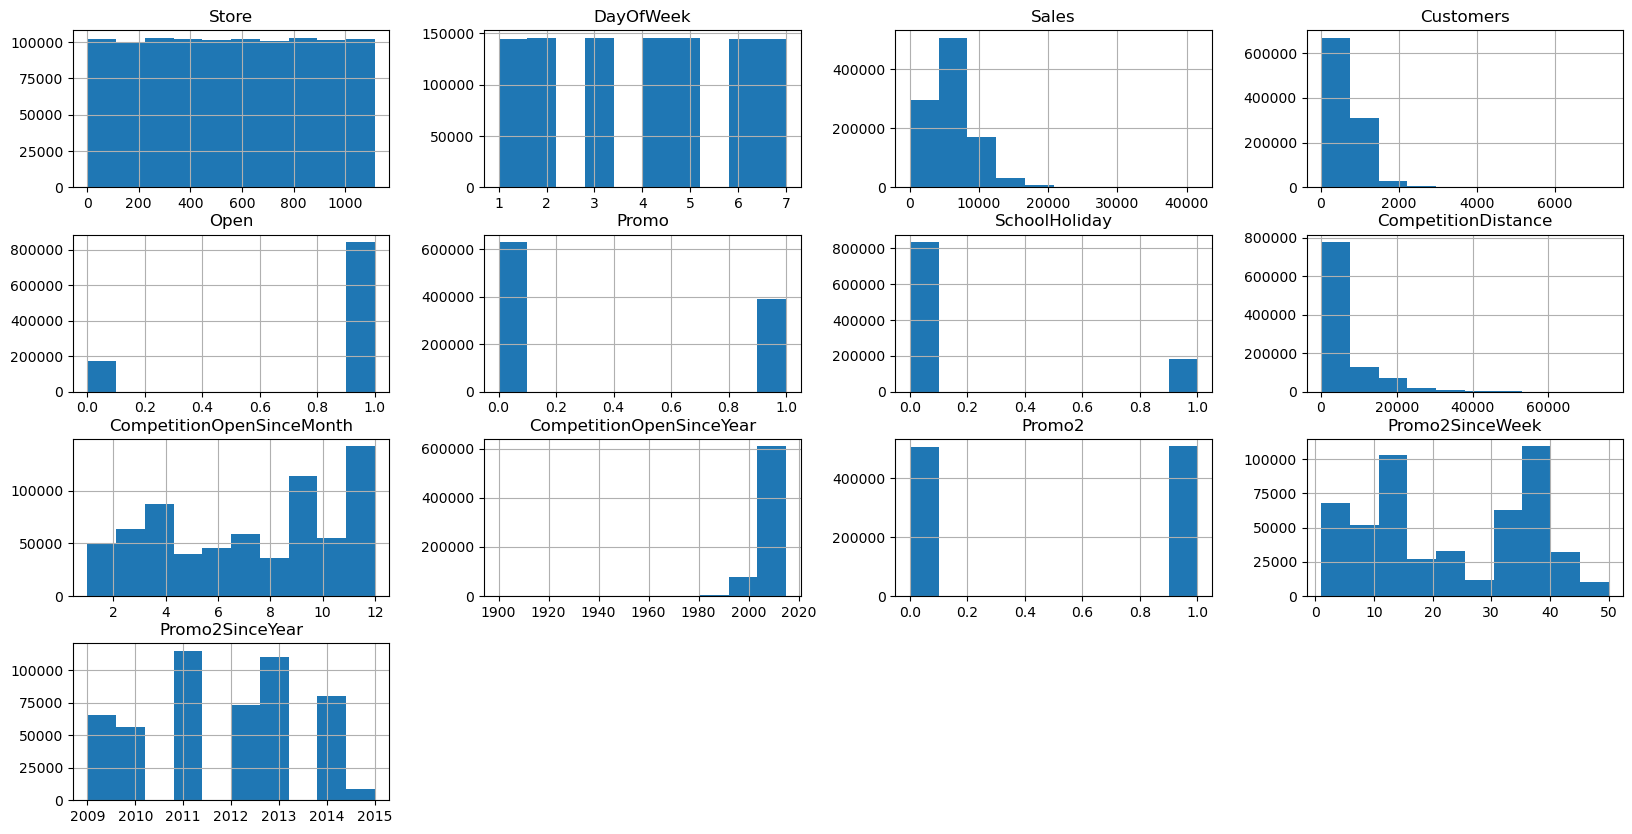

In [17]:
merged_df.hist(figsize=(20,10))
plt.show()

In [18]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [19]:
#Preprocessing and  
# feature engineering-->Combining columnns to get more information and useful coulmns

In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [21]:
def split_date(df):
    df['Date']=pd.to_datetime(df['Date'])
    df['Year']=df['Date'].dt.year
    df['Month']=df['Date'].dt.month
    df['Day']=df['Date'].dt.day
    df['WeekofYear']=df['Date'].dt.isocalendar().week


In [22]:
split_date(merged_df)
split_date(merged_test_df)

In [23]:
merged_df


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekofYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


In [24]:
merged_df[merged_df.Open==0].Sales.value_counts()

Sales
0    172817
Name: count, dtype: int64

In [25]:
#Removiing the dates where all days store is closed

In [26]:
merged_df=merged_df[merged_df.Open==1].copy()

In [27]:
# Inatead of having differnet columns for how long competitietion is opened 
# in months and year we can convert whole in one month column
#which is more beneficiary for  our model

In [28]:
def comp_months(df):
    df['CompetitionOpen']=12*(df.Year-df.CompetitionOpenSinceYear)+(df.Month-df.CompetitionOpenSinceMonth)
    df['CompetitionOpen']=df['CompetitionOpen'].map(lambda x:0 if x< 0 else x).fillna(0)


In [29]:
comp_months(merged_df)
comp_months(merged_test_df)

In [30]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekofYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0


In [31]:
# Now coding the promo interval column to indicate how long a store has been running promo2
#and whether a new round of promo2 is starts in the current month

In [32]:
def check_promo_month(row):
    month2str={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
    try:
        month=(row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in month:
            return 1
        else:
            return 0
    except Exception :
        return 0


In [33]:

def promo_cols(df):
    #Months  since promo2 is open
    df['Promo2Open']=12*(df.Year-df.Promo2SinceYear)+(df.WeekofYear-df.Promo2SinceWeek)/4.34
    df['Promo2Open']=df['Promo2Open'].map(lambda x:0 if x< 0 else x).fillna(0)*df['Promo2']
    #Whether a new round of promo2 starts in the current month
    df['IsPromo2Month']=df.apply(check_promo_month,axis=1)*df['Promo2']

In [34]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [35]:
merged_df[['Date','Promo2','Promo2SinceWeek','Promo2SinceYear','Promo2Open','PromoInterval','IsPromo2Month']].sample(10)

,Date,Promo2,Promo2SinceWeek,Promo2SinceYear,Promo2Open,PromoInterval,IsPromo2Month
795099,2013-07-19,1,14.0,2011.0,27.456221,"Jan,Apr,Jul,Oct",1
165851,2015-03-05,1,45.0,2009.0,63.935484,"Feb,May,Aug,Nov",0
445536,2014-05-28,1,37.0,2009.0,56.543779,"Jan,Apr,Jul,Oct",0
779108,2013-08-02,1,37.0,2009.0,46.617512,"Jan,Apr,Jul,Oct",0
606335,2014-01-04,0,NaN,NaN,0.000000,NaN,0
871224,2013-05-11,0,NaN,NaN,0.000000,NaN,0
513638,2014-03-28,1,1.0,2013.0,14.764977,"Jan,Apr,Jul,Oct",0
939962,2013-03-11,1,10.0,2014.0,0.000000,"Mar,Jun,Sept,Dec",0
283952,2014-11-11,1,1.0,2014.0,10.368664,"Jan,Apr,Jul,Oct",0
585098,2014-01-23,1,37.0,2009.0,52.396313,"Jan,Apr,Jul,Oct",1


In [36]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekofYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [37]:
input_cols=['Store','DayOfWeek','Promo','StateHoliday','SchoolHoliday'
            ,'StoreType','Assortment','CompetitionDistance','CompetitionOpen',
            'Day','Month','Year','WeekofYear','Promo2','Promo2Open','IsPromo2Month']
target_col=['Sales']

In [38]:
inputs=merged_df[input_cols].copy()
targets=merged_df[target_col].copy()

In [39]:
inputs

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekofYear,Promo2,Promo2Open,IsPromo2Month
0,1,5,1,0,1,c,a,1270.0,82.0,31,7,2015,31,0,0.000000,0
1,2,5,1,0,1,a,a,570.0,92.0,31,7,2015,31,1,64.147465,1
2,3,5,1,0,1,a,a,14130.0,103.0,31,7,2015,31,1,51.917051,1
3,4,5,1,0,1,c,c,620.0,70.0,31,7,2015,31,0,0.000000,0
4,5,5,1,0,1,a,a,29910.0,3.0,31,7,2015,31,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,0,a,1,b,a,150.0,76.0,1,1,2013,1,0,0.000000,0
1016827,733,2,0,a,1,b,b,860.0,159.0,1,1,2013,1,0,0.000000,0
1016863,769,2,0,a,1,b,b,840.0,0.0,1,1,2013,1,1,1.170507,1
1017042,948,2,0,a,1,b,b,1430.0,0.0,1,1,2013,1,0,0.000000,0


In [40]:
targets

,Sales
0,5263
1,6064
2,8314
3,13995
4,4822
...,...
1016776,3375
1016827,10765
1016863,5035
1017042,4491


In [41]:
test_inputs=merged_test_df[input_cols].copy()

In [42]:
test_inputs
#Train and test should have same numbersnof columns

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekofYear,Promo2,Promo2Open,IsPromo2Month
0,1,4,1,0,0,c,a,1270.0,84.0,17,9,2015,38,0,0.000000,0
1,3,4,1,0,0,a,a,14130.0,105.0,17,9,2015,38,1,53.529954,0
2,7,4,1,0,0,a,c,24000.0,29.0,17,9,2015,38,0,0.000000,0
3,8,4,1,0,0,a,a,7520.0,11.0,17,9,2015,38,0,0.000000,0
4,9,4,1,0,0,a,c,2030.0,181.0,17,9,2015,38,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,0,0,0,a,a,1900.0,14.0,1,8,2015,31,1,24.000000,0
41084,1112,6,0,0,0,c,c,1880.0,112.0,1,8,2015,31,0,0.000000,0
41085,1113,6,0,0,0,a,c,9260.0,0.0,1,8,2015,31,0,0.000000,0
41086,1114,6,0,0,0,a,c,870.0,0.0,1,8,2015,31,0,0.000000,0


In [43]:
numeric_cols=['Store','Promo','SchoolHoliday'
            ,'CompetitionDistance','CompetitionOpen','Day','Month'
            ,'Year','WeekofYear','Promo2','Promo2Open','IsPromo2Month']
categorical_cols=['DayOfWeek','StateHoliday','StoreType','Assortment']

In [44]:
#Imputing missing numerical values

In [45]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Day                       0
Month                     0
Year                      0
WeekofYear                0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
dtype: int64

In [46]:
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Day                     0
Month                   0
Year                    0
WeekofYear              0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
dtype: int64

In [47]:
inputs.CompetitionDistance.max()

75860.0

In [48]:
inputs['CompetitionDistance'].fillna(inputs['CompetitionDistance'].max(),inplace=True)
test_inputs['CompetitionDistance'].fillna(inputs['CompetitionDistance'].max(),inplace=True)

C:\Users\shrey\AppData\Local\Temp\ipykernel_38696\1913434881.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inputs['CompetitionDistance'].fillna(inputs['CompetitionDistance'].max(),inplace=True)
C:\Users\shrey\AppData\Local\Temp\ipykernel_38696\1913434881.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [49]:
#Scaling of numeric columns

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler=MinMaxScaler().fit(inputs[numeric_cols])

In [52]:
#Encoding categorical columns


In [53]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
inputs[categorical_cols] = inputs[categorical_cols].astype(str)
test_inputs[categorical_cols] = test_inputs[categorical_cols].astype(str)

In [63]:
encoder=OneHotEncoder(handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
# Transform the training data and create a DataFrame for the encoded columns
inputs_encoded = pd.DataFrame(
    encoder.transform(inputs[categorical_cols]).toarray(),  
    columns=encoded_cols, 
    index=inputs.index  
)

# Transform the test data similarly
test_inputs_encoded = pd.DataFrame(
    encoder.transform(test_inputs[categorical_cols]).toarray(),
    columns=encoded_cols, 
    index=test_inputs.index  
)


# Merge the encoded data with the original inputs
inputs = inputs.join(inputs_encoded, rsuffix='_encoded')
test_inputs = test_inputs.join(test_inputs_encoded, rsuffix='_encoded')




In [65]:
X=inputs[numeric_cols+encoded_cols]
X_test=test_inputs[numeric_cols+encoded_cols]

In [66]:
#Gradient Boosting machine(GBM) model

In [67]:

#We’re now ready to train our gradient boosting machine (GBM) model. Here’s how a GBM model works:
#
#1. The average value of the target column and uses as an initial prediction every input.
#2. The residuals (difference) of the predictions with the targets are computed.
#3. A decision tree of limited depth is trained to **predict just the residuals** for each input.
#4. Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting).
#5. Scaled predictions for the tree are added to the previous predictions to obtain the new and improved predictions.
#6. Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.

#The term “gradient” refers to the fact that each decision tree 
#is trained with the purpose of reducing the loss
#from the previous iteration (similar to gradient descent). 
#The term “boosting” refers to the general technique of training new models to 
#improve the results of an existing model.


In [68]:
from xgboost import XGBRegressor

In [69]:
model=XGBRegressor(max_depth=4,n_jobs=-1,learning_rate=0.1,random_state=42,n_estimators=100)

In [70]:
model.fit(X,targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [71]:
#PRedicting the sales for test data

In [72]:
preds=model.predict(X)

In [73]:
preds.shape

(844392,)

In [74]:
targets.shape

(844392, 1)

In [75]:
#Evaluation

In [76]:
from sklearn.metrics import mean_squared_error

In [77]:
def rmse(a,b):
    return mean_squared_error(a,b,squared=False)

In [78]:
rmse(preds,targets)

c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2258.379584660154

In [79]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [81]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,30

In [ ]:
plot_tree(model,rankdir='LR',num_trees=0)

In [84]:
#Feature importance

In [87]:

# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)





In [88]:
# Display the top 10 most important features
importance_df.head(10)

,feature,importance
1,Promo,0.286884
12,DayOfWeek_1,0.107677
24,StoreType_b,0.075646
9,Promo2,0.070265
27,Assortment_a,0.054015
26,StoreType_d,0.043768
2,SchoolHoliday,0.036746
3,CompetitionDistance,0.036181
6,Month,0.026714
8,WeekofYear,0.026573


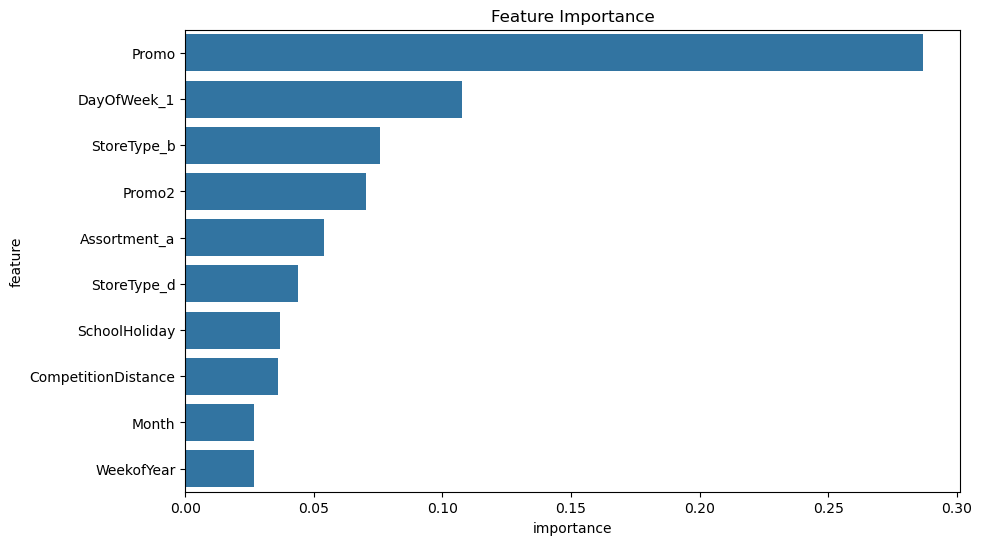

In [89]:
# Plot feature importance using seaborn
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.show()


In [ ]:
#we didnt create a validation set before becuase
#we will use a different approcah called cross validation

In [ ]:
#K-Fold Cross Validation--> More Useful for small datasets

In [93]:
from sklearn.model_selection import KFold

In [94]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    
    return model, train_rmse, val_rmse


In [ ]:
models=[]
for train_idxs,val_idxs in KFold.split(X):
    X_train,train_targets=X.iloc[train_idxs],targets.iloc[train_idxs]
    X_val,val_targets=X.iloc[val_idxs],targets.iloc[val_idxs]
    model,train_rmse,val_rmse=train_and_evaluate(X_train,train_targets,X_val,val_targets,max_depth=4,n_estimators=20,learning_rate=0.1)
    models.append(model)
    print('Train RMSE:',train_rmse,'Val RMSE:',val_rmse)

c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Train RMSE: 2607.3561603620115 Val RMSE: 2638.6559730359427


c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Train RMSE: 2611.6866547549384 Val RMSE: 2647.3067954862167


c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Train RMSE: 2620.1160479111154 Val RMSE: 2565.8927019902694


c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Train RMSE: 2584.3316244147522 Val RMSE: 2691.5192675794133
Train RMSE: 2594.8931086096422 Val RMSE: 2610.02526675998


c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [98]:
def pred_avg(models,inputs):
    return np.mean([model.predict(inputs) for model in models],axis=0)

In [99]:
preds=pred_avg(models,X)

In [100]:
preds

array([8048.991 , 7732.108 , 8142.499 , ..., 7527.4985, 7161.246 ,
       8846.524 ], dtype=float32)

In [101]:
#Hyperparameters Tuning and Regularization

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train,X_val,train_targets,val_targets=train_test_split(X,targets,test_size=0.1,random_state=42)

In [104]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))


In [105]:
#n_estimators is the number of trees in the forest

In [106]:
test_params(n_estimators=10)

Train RMSE: 2372.176942163459, Validation RMSE: 2383.6837363674717


c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [107]:
test_params(n_estimators=30)

Train RMSE: 1899.575875953284, Validation RMSE: 1908.963055881206


c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [108]:
test_params(n_estimators=100)

Train RMSE: 1177.5523047871047, Validation RMSE: 1188.151706399284


c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [109]:
test_params(n_estimators=240)

Train RMSE: 900.8968238345544, Validation RMSE: 919.6476054774968


c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [110]:
#Max_depth is the maximum depth of the tree

In [111]:
test_params(max_depth=3,n_estimators=10)

Train RMSE: 2602.765156972003, Validation RMSE: 2613.565536628


c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [112]:
test_params(max_depth=5,n_estimators=10)

Train RMSE: 2475.8921504694, Validation RMSE: 2487.1084158741264


c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [116]:
test_params(max_depth=14,n_estimators=10)

Train RMSE: 1296.422848465954, Validation RMSE: 1430.9658806285015


c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [117]:
#Learning rate is the scaling factor for predictions from each tree

In [119]:
test_params(learning_rate=0.01,n_estimators=50)

Train RMSE: 2787.1617515415146, Validation RMSE: 2801.679951294694


c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [120]:
test_params(learning_rate=0.1,n_estimators=50)

Train RMSE: 2185.7818904939895, Validation RMSE: 2196.5402423728838


c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [121]:
test_params(learning_rate=0.3,n_estimators=50)

Train RMSE: 1560.9839044657997, Validation RMSE: 1571.0569333397539


c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [122]:
test_params(learning_rate=0.5,n_estimators=50)

Train RMSE: 1273.691213760481, Validation RMSE: 1280.4243595192397


c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [123]:
test_params(learning_rate=0.9,n_estimators=50)

Train RMSE: 1107.101394861979, Validation RMSE: 1117.6113853483694


c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [124]:
test_params(learning_rate=0.99,n_estimators=50)

Train RMSE: 1155.3529542007643, Validation RMSE: 1163.940475128019


c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
#Booster->xgbooast can also train a model with linear booster for each iteration

In [128]:
test_params(booster='gblinear',learning_rate=0.1,n_estimators=100)

Train RMSE: 2728.27611406221, Validation RMSE: 2736.983733013698


c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\shrey\cond2\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
